In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from heapq import nsmallest

In [2]:
DATA_SET = "E:/Study/Notes 10th Sem/COMPUTER VISION AND PATTERN RECOGNITION [A]/DATA_SETS/CIFAR10"

In [3]:
import csv
TRAIN_LABELS = []
csv_file = os.path.join(DATA_SET, "trainLabels.csv")
with open(csv_file, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        TRAIN_LABELS.append(row)
        
TRAIN_LABELS.pop(0)
print(len(TRAIN_LABELS))
print(TRAIN_LABELS[0:10])
for i in range(len(TRAIN_LABELS)):
    name = TRAIN_LABELS[i][1]
    print(name)

50000
[['1', 'frog'], ['2', 'truck'], ['3', 'truck'], ['4', 'deer'], ['5', 'automobile'], ['6', 'automobile'], ['7', 'bird'], ['8', 'horse'], ['9', 'ship'], ['10', 'cat']]
frog
truck
truck
deer
automobile
automobile
bird
horse
ship
cat
deer
horse
horse
bird
truck
truck
truck
cat
bird
frog
deer
cat
frog
frog
bird
frog
cat
dog
deer
airplane
airplane
truck
automobile
cat
deer
airplane
cat
horse
cat
cat
dog
bird
bird
horse
automobile
automobile
automobile
bird
bird
airplane
truck
dog
horse
truck
bird
bird
dog
bird
deer
cat
automobile
automobile
ship
bird
automobile
automobile
deer
truck
horse
ship
dog
truck
frog
horse
cat
automobile
truck
airplane
cat
automobile
cat
dog
deer
dog
horse
horse
deer
horse
truck
deer
bird
cat
ship
airplane
automobile
frog
automobile
automobile
deer
automobile
ship
cat
truck
frog
frog
automobile
ship
dog
bird
truck
truck
ship
automobile
horse
horse
airplane
airplane
frog
truck
automobile
bird
bird
truck
bird
frog
frog
automobile
truck
dog
airplane
deer
horse
fro

truck
airplane
dog
bird
automobile
airplane
bird
ship
ship
airplane
dog
horse
frog
frog
dog
cat
horse
horse
horse
deer
bird
airplane
automobile
horse
cat
bird
horse
cat
bird
bird
automobile
dog
truck
truck
ship
airplane
ship
deer
cat
cat
ship
dog
airplane
ship
deer
dog
horse
dog
automobile
dog
airplane
bird
airplane
dog
deer
bird
cat
frog
bird
frog
bird
bird
cat
deer
frog
frog
dog
cat
airplane
automobile
bird
horse
horse
dog
cat
automobile
automobile
horse
frog
automobile
frog
cat
cat
cat
cat
deer
ship
automobile
airplane
horse
horse
frog
ship
automobile
bird
dog
cat
deer
automobile
automobile
truck
cat
automobile
deer
bird
horse
automobile
frog
dog
horse
horse
horse
frog
frog
automobile
truck
dog
airplane
truck
dog
horse
airplane
airplane
deer
frog
ship
airplane
automobile
dog
airplane
truck
cat
automobile
automobile
bird
airplane
cat
bird
truck
automobile
truck
frog
bird
deer
ship
ship
dog
truck
bird
automobile
truck
deer
deer
cat
airplane
frog
frog
airplane
deer
automobile
airplane


horse
deer
ship
frog
dog
truck
ship
truck
truck
deer
deer
ship
frog
frog
deer
bird
automobile
ship
cat
cat
airplane
cat
ship
truck
bird
frog
bird
frog
dog
frog
ship
deer
cat
dog
airplane
cat
bird
airplane
airplane
deer
ship
truck
ship
frog
truck
bird
automobile
airplane
horse
truck
airplane
dog
airplane
frog
bird
airplane
frog
horse
frog
bird
frog
horse
ship
bird
deer
horse
frog
ship
horse
horse
cat
bird
dog
truck
cat
ship
bird
frog
deer
truck
frog
bird
automobile
deer
airplane
frog
frog
deer
cat
deer
dog
cat
frog
dog
truck
truck
dog
automobile
frog
airplane
bird
horse
truck
dog
cat
dog
frog
bird
automobile
dog
dog
truck
airplane
automobile
cat
deer
dog
horse
deer
dog
truck
frog
automobile
horse
deer
bird
ship
ship
dog
frog
airplane
cat
deer
truck
deer
dog
frog
airplane
horse
airplane
cat
airplane
horse
dog
ship
cat
ship
automobile
dog
truck
automobile
airplane
automobile
ship
airplane
ship
bird
dog
frog
horse
automobile
airplane
bird
truck
airplane
deer
automobile
truck
dog
cat
dog
ho

bird
airplane
cat
frog
cat
truck
airplane
cat
cat
ship
airplane
ship
ship
airplane
truck
deer
ship
deer
frog
deer
deer
cat
cat
airplane
deer
truck
frog
horse
truck
dog
deer
cat
dog
dog
dog
bird
cat
frog
dog
dog
truck
automobile
frog
deer
automobile
airplane
dog
horse
truck
cat
airplane
frog
ship
truck
horse
frog
bird
ship
airplane
airplane
bird
truck
airplane
cat
bird
horse
bird
horse
cat
bird
cat
horse
horse
dog
cat
ship
dog
deer
airplane
bird
truck
automobile
cat
bird
dog
ship
airplane
frog
automobile
horse
dog
truck
horse
horse
dog
airplane
automobile
automobile
truck
deer
bird
automobile
ship
bird
bird
bird
horse
cat
horse
airplane
deer
frog
frog
bird
truck
cat
airplane
frog
airplane
automobile
truck
cat
dog
deer
truck
frog
horse
cat
frog
ship
cat
truck
bird
airplane
truck
dog
deer
horse
bird
cat
truck
truck
dog
airplane
cat
automobile
horse
bird
deer
horse
truck
truck
airplane
deer
deer
dog
automobile
horse
automobile
ship
deer
automobile
deer
bird
automobile
frog
truck
bird
bird


bird
automobile
airplane
airplane
ship
ship
bird
ship
dog
horse
cat
cat
dog
deer
truck
deer
horse
frog
automobile
ship
deer
truck
horse
deer
cat
ship
bird
truck
horse
horse
dog
frog
airplane
frog
cat
automobile
cat
ship
bird
bird
truck
horse
ship
ship
airplane
airplane
horse
dog
automobile
automobile
frog
dog
ship
horse
deer
frog
bird
horse
horse
ship
horse
dog
dog
horse
frog
deer
frog
bird
bird
ship
truck
frog
truck
deer
frog
ship
ship
bird
automobile
cat
cat
ship
deer
airplane
deer
horse
bird
dog
deer
deer
airplane
ship
deer
cat
frog
cat
ship
ship
bird
truck
frog
truck
dog
frog
bird
cat
horse
automobile
deer
horse
truck
airplane
dog
ship
frog
horse
cat
automobile
horse
bird
dog
frog
frog
airplane
dog
airplane
ship
deer
bird
deer
deer
horse
automobile
dog
ship
dog
bird
cat
ship
ship
deer
truck
ship
dog
truck
dog
bird
dog
ship
deer
horse
cat
cat
cat
automobile
cat
ship
truck
cat
ship
automobile
ship
cat
frog
truck
bird
bird
frog
cat
dog
dog
horse
cat
frog
airplane
automobile
bird
autom

frog
truck
dog
airplane
airplane
bird
ship
dog
deer
airplane
dog
automobile
cat
cat
deer
truck
dog
cat
cat
automobile
airplane
automobile
bird
bird
cat
frog
automobile
bird
horse
ship
automobile
truck
airplane
frog
ship
frog
airplane
ship
truck
bird
cat
horse
frog
bird
truck
ship
ship
frog
cat
airplane
frog
truck
dog
truck
airplane
horse
bird
airplane
automobile
bird
deer
automobile
horse
dog
dog
bird
truck
bird
airplane
dog
horse
deer
horse
horse
bird
horse
frog
dog
automobile
dog
truck
horse
bird
airplane
ship
truck
ship
frog
ship
dog
airplane
horse
horse
ship
bird
automobile
frog
automobile
cat
automobile
frog
frog
ship
bird
cat
horse
truck
ship
cat
ship
dog
horse
airplane
automobile
airplane
horse
deer
bird
airplane
deer
truck
deer
bird
horse
horse
deer
deer
automobile
automobile
airplane
truck
airplane
truck
ship
frog
deer
horse
bird
bird
bird
frog
airplane
bird
automobile
airplane
bird
ship
deer
deer
frog
dog
truck
airplane
automobile
automobile
ship
dog
automobile
automobile
shi

dog
horse
dog
frog
truck
cat
horse
bird
automobile
cat
horse
cat
bird
dog
bird
ship
cat
ship
frog
dog
bird
bird
horse
dog
ship
cat
bird
horse
airplane
cat
frog
cat
truck
automobile
bird
frog
cat
dog
cat
automobile
ship
frog
cat
frog
airplane
truck
airplane
dog
dog
horse
ship
cat
bird
frog
bird
truck
deer
bird
cat
cat
truck
cat
horse
horse
frog
horse
frog
automobile
dog
frog
deer
truck
airplane
deer
deer
automobile
frog
dog
frog
automobile
frog
cat
horse
horse
frog
ship
horse
bird
airplane
horse
automobile
cat
bird
automobile
truck
deer
airplane
airplane
horse
automobile
horse
frog
truck
airplane
frog
bird
cat
deer
bird
dog
frog
frog
airplane
dog
dog
bird
automobile
frog
horse
cat
horse
cat
dog
airplane
bird
truck
bird
bird
bird
truck
cat
frog
horse
ship
dog
dog
automobile
dog
frog
bird
frog
horse
automobile
bird
truck
automobile
airplane
airplane
cat
cat
bird
airplane
cat
deer
automobile
horse
horse
truck
bird
airplane
ship
frog
ship
dog
cat
dog
dog
dog
dog
automobile
cat
deer
bird
shi

deer
horse
ship
airplane
frog
airplane
airplane
automobile
bird
truck
bird
bird
automobile
deer
horse
automobile
ship
bird
airplane
automobile
dog
frog
bird
dog
frog
dog
airplane
automobile
cat
ship
airplane
automobile
dog
horse
bird
airplane
cat
cat
truck
cat
automobile
frog
dog
airplane
airplane
truck
bird
ship
dog
truck
bird
frog
frog
truck
ship
frog
bird
cat
horse
airplane
cat
airplane
dog
automobile
cat
airplane
cat
horse
cat
cat
ship
truck
dog
automobile
automobile
dog
frog
deer
dog
dog
horse
airplane
bird
automobile
ship
airplane
dog
dog
horse
bird
ship
ship
frog
automobile
horse
frog
dog
automobile
frog
horse
truck
horse
frog
truck
automobile
bird
ship
horse
truck
deer
horse
horse
frog
truck
ship
frog
bird
dog
frog
automobile
deer
horse
horse
truck
automobile
dog
dog
automobile
frog
bird
truck
automobile
ship
automobile
dog
truck
dog
frog
bird
deer
airplane
automobile
cat
frog
ship
cat
horse
truck
dog
airplane
ship
frog
bird
horse
bird
frog
airplane
horse
deer
frog
horse
deer
d

automobile
automobile
cat
ship
truck
ship
cat
frog
deer
dog
horse
horse
automobile
ship
horse
frog
ship
horse
frog
truck
cat
dog
bird
horse
truck
ship
dog
cat
frog
automobile
deer
deer
truck
frog
airplane
frog
horse
airplane
deer
truck
dog
ship
airplane
deer
cat
ship
deer
horse
automobile
ship
cat
dog
deer
dog
horse
deer
ship
frog
deer
ship
frog
truck
frog
dog
airplane
truck
dog
truck
bird
frog
deer
horse
frog
frog
frog
frog
automobile
ship
airplane
horse
ship
horse
frog
ship
frog
automobile
frog
cat
bird
horse
truck
cat
horse
automobile
frog
automobile
truck
frog
frog
bird
truck
horse
bird
automobile
horse
frog
horse
horse
dog
frog
frog
airplane
frog
horse
cat
horse
truck
cat
frog
truck
airplane
airplane
bird
dog
truck
bird
ship
frog
bird
deer
truck
airplane
horse
horse
automobile
truck
airplane
dog
truck
deer
cat
frog
cat
bird
frog
ship
deer
airplane
automobile
airplane
frog
horse
bird
truck
horse
bird
cat
truck
bird
bird
deer
cat
ship
cat
dog
deer
horse
dog
bird
ship
horse
airplane


airplane
truck
deer
deer
dog
frog
cat
horse
truck
bird
truck
dog
truck
ship
dog
bird
automobile
frog
cat
truck
automobile
automobile
cat
ship
automobile
automobile
ship
automobile
truck
deer
horse
horse
automobile
frog
truck
frog
horse
automobile
cat
ship
horse
dog
ship
automobile
dog
ship
airplane
ship
ship
automobile
airplane
bird
automobile
cat
frog
ship
truck
ship
horse
cat
frog
airplane
dog
ship
frog
automobile
automobile
automobile
deer
ship
frog
cat
horse
deer
deer
horse
cat
truck
bird
deer
deer
cat
cat
ship
deer
horse
cat
truck
cat
airplane
dog
airplane
bird
cat
horse
frog
truck
cat
ship
bird
dog
ship
cat
truck
horse
bird
airplane
frog
ship
cat
frog
airplane
deer
deer
dog
airplane
horse
airplane
deer
airplane
bird
bird
frog
airplane
bird
truck
automobile
bird
airplane
dog
horse
cat
truck
cat
truck
airplane
airplane
dog
airplane
cat
frog
automobile
airplane
truck
truck
horse
automobile
automobile
horse
bird
airplane
ship
bird
frog
horse
ship
dog
bird
deer
cat
ship
automobile
bir

deer
bird
truck
horse
cat
dog
automobile
dog
deer
cat
dog
deer
bird
dog
cat
automobile
horse
cat
automobile
horse
bird
cat
cat
truck
bird
deer
horse
ship
deer
frog
automobile
bird
cat
truck
cat
horse
ship
deer
bird
horse
airplane
cat
deer
airplane
frog
bird
dog
deer
truck
ship
ship
dog
horse
automobile
horse
cat
dog
ship
deer
horse
airplane
automobile
automobile
horse
bird
ship
cat
frog
frog
horse
ship
deer
horse
airplane
truck
frog
dog
frog
frog
deer
airplane
ship
truck
ship
horse
deer
automobile
dog
deer
frog
automobile
horse
truck
ship
deer
deer
ship
automobile
dog
bird
ship
deer
truck
dog
dog
cat
frog
airplane
bird
dog
dog
dog
horse
airplane
horse
truck
dog
cat
automobile
cat
frog
bird
dog
bird
horse
horse
airplane
deer
ship
automobile
frog
frog
frog
dog
airplane
dog
horse
deer
airplane
frog
airplane
deer
ship
dog
ship
frog
frog
bird
dog
airplane
frog
ship
ship
frog
cat
horse
frog
deer
ship
airplane
automobile
dog
deer
deer
dog
airplane
ship
dog
deer
dog
bird
horse
deer
cat
automob

horse
cat
ship
ship
bird
cat
deer
airplane
truck
airplane
airplane
automobile
horse
dog
dog
ship
frog
truck
frog
dog
dog
deer
automobile
frog
cat
horse
bird
ship
ship
dog
automobile
dog
cat
automobile
deer
horse
ship
frog
ship
frog
frog
cat
frog
cat
ship
ship
automobile
deer
dog
automobile
frog
deer
truck
truck
truck
truck
cat
deer
cat
airplane
cat
cat
bird
frog
cat
cat
ship
cat
airplane
bird
cat
frog
automobile
airplane
bird
airplane
ship
frog
dog
deer
horse
bird
automobile
bird
frog
automobile
horse
bird
truck
deer
automobile
airplane
bird
automobile
bird
truck
bird
frog
dog
bird
deer
horse
airplane
horse
airplane
cat
bird
cat
bird
deer
airplane
deer
horse
cat
truck
bird
bird
horse
frog
cat
airplane
deer
frog
truck
deer
bird
horse
cat
automobile
cat
ship
automobile
ship
frog
ship
truck
truck
cat
airplane
dog
ship
automobile
airplane
horse
deer
frog
deer
airplane
ship
truck
horse
dog
automobile
ship
horse
automobile
ship
bird
airplane
frog
cat
cat
cat
dog
frog
deer
cat
cat
cat
bird
tr

cat
truck
ship
truck
cat
deer
dog
dog
ship
automobile
dog
automobile
truck
frog
ship
dog
automobile
deer
cat
truck
dog
cat
horse
bird
dog
frog
cat
automobile
deer
ship
dog
truck
bird
ship
truck
deer
automobile
automobile
horse
frog
automobile
ship
cat
airplane
cat
bird
deer
bird
bird
cat
deer
ship
bird
automobile
cat
ship
deer
horse
airplane
automobile
cat
ship
frog
horse
horse
frog
automobile
frog
ship
automobile
automobile
frog
bird
deer
ship
truck
bird
airplane
horse
cat
truck
deer
automobile
deer
dog
cat
cat
frog
ship
automobile
automobile
horse
cat
truck
airplane
dog
frog
cat
bird
cat
bird
automobile
cat
horse
frog
cat
horse
bird
bird
frog
truck
horse
deer
ship
cat
ship
airplane
deer
ship
deer
ship
ship
horse
automobile
bird
airplane
ship
dog
bird
horse
cat
bird
horse
automobile
ship
truck
horse
ship
horse
bird
bird
airplane
truck
deer
automobile
airplane
airplane
frog
cat
horse
dog
truck
horse
ship
deer
bird
deer
cat
deer
airplane
truck
horse
horse
horse
automobile
airplane
truck

automobile
automobile
deer
bird
automobile
bird
horse
horse
automobile
ship
horse
dog
truck
frog
airplane
truck
frog
frog
automobile
ship
dog
truck
automobile
deer
automobile
dog
airplane
dog
cat
airplane
airplane
truck
truck
dog
bird
frog
deer
horse
bird
ship
airplane
dog
deer
horse
dog
airplane
horse
ship
frog
airplane
automobile
deer
airplane
automobile
dog
horse
cat
frog
automobile
airplane
cat
truck
deer
deer
ship
automobile
automobile
deer
truck
frog
dog
bird
airplane
bird
horse
truck
cat
automobile
automobile
automobile
truck
airplane
automobile
horse
dog
horse
deer
airplane
truck
cat
frog
dog
ship
bird
frog
airplane
dog
horse
cat
automobile
cat
ship
ship
cat
automobile
airplane
horse
bird
truck
cat
deer
horse
horse
dog
bird
frog
ship
automobile
automobile
airplane
deer
airplane
deer
dog
ship
airplane
ship
airplane
automobile
automobile
airplane
horse
deer
automobile
horse
cat
cat
horse
airplane
truck
automobile
truck
truck
airplane
cat
automobile
ship
truck
bird
cat
horse
horse

frog
cat
ship
horse
automobile
truck
automobile
truck
frog
automobile
automobile
cat
dog
automobile
deer
frog
deer
frog
dog
truck
ship
cat
truck
ship
cat
dog
ship
airplane
truck
horse
automobile
frog
airplane
horse
airplane
truck
deer
automobile
airplane
bird
dog
frog
dog
dog
airplane
truck
airplane
truck
automobile
ship
truck
deer
frog
ship
horse
frog
frog
truck
automobile
dog
automobile
airplane
bird
frog
cat
automobile
bird
ship
dog
truck
truck
automobile
horse
cat
cat
bird
frog
ship
cat
deer
bird
frog
dog
cat
dog
airplane
ship
dog
bird
automobile
bird
airplane
horse
cat
deer
cat
cat
cat
cat
dog
truck
horse
ship
cat
airplane
frog
horse
bird
frog
bird
airplane
bird
cat
truck
cat
automobile
bird
automobile
ship
ship
dog
ship
ship
deer
truck
deer
dog
bird
dog
ship
dog
airplane
bird
ship
frog
truck
truck
cat
airplane
truck
automobile
deer
ship
ship
bird
horse
airplane
ship
cat
truck
frog
deer
cat
automobile
horse
truck
automobile
frog
frog
truck
ship
truck
ship
cat
truck
cat
truck
horse

dog
ship
frog
horse
deer
horse
frog
airplane
horse
airplane
deer
dog
cat
horse
automobile
dog
automobile
cat
deer
bird
horse
frog
frog
truck
dog
deer
horse
airplane
cat
deer
frog
ship
frog
ship
frog
truck
horse
bird
horse
ship
deer
frog
horse
frog
frog
dog
frog
ship
dog
deer
dog
truck
airplane
cat
truck
airplane
dog
bird
bird
dog
horse
bird
deer
cat
horse
airplane
automobile
truck
horse
cat
automobile
dog
automobile
frog
truck
automobile
dog
ship
automobile
automobile
frog
automobile
frog
truck
truck
bird
ship
truck
airplane
truck
dog
bird
automobile
horse
cat
deer
cat
bird
airplane
automobile
truck
deer
ship
cat
bird
frog
horse
truck
bird
horse
airplane
truck
truck
horse
cat
dog
deer
deer
horse
horse
automobile
truck
cat
deer
airplane
automobile
ship
cat
frog
horse
deer
truck
cat
bird
bird
dog
deer
cat
automobile
ship
deer
truck
dog
deer
truck
automobile
frog
frog
cat
cat
frog
bird
dog
deer
deer
automobile
dog
automobile
bird
airplane
deer
frog
automobile
automobile
truck
airplane
aut

automobile
cat
ship
cat
truck
automobile
deer
truck
bird
airplane
deer
frog
bird
automobile
ship
dog
deer
bird
cat
dog
bird
cat
bird
frog
dog
ship
horse
frog
automobile
airplane
ship
automobile
cat
frog
automobile
bird
frog
automobile
frog
airplane
horse
deer
dog
deer
dog
truck
ship
bird
dog
deer
ship
ship
ship
bird
frog
bird
ship
ship
automobile
airplane
deer
dog
airplane
airplane
deer
dog
bird
truck
frog
deer
deer
ship
automobile
bird
bird
ship
automobile
airplane
frog
airplane
horse
airplane
dog
cat
bird
dog
ship
automobile
truck
deer
horse
horse
ship
deer
horse
automobile
dog
truck
horse
ship
truck
deer
automobile
deer
horse
frog
airplane
truck
truck
dog
horse
frog
automobile
cat
bird
cat
cat
airplane
frog
ship
truck
dog
truck
horse
automobile
frog
bird
deer
cat
cat
frog
deer
dog
airplane
horse
deer
frog
airplane
bird
airplane
truck
horse
deer
ship
bird
frog
airplane
airplane
cat
ship
frog
airplane
frog
cat
bird
automobile
deer
truck
deer
horse
dog
truck
truck
frog
dog
truck
cat
fr

bird
automobile
deer
airplane
ship
automobile
ship
ship
ship
truck
bird
dog
horse
bird
airplane
automobile
truck
automobile
ship
truck
bird
deer
airplane
bird
dog
bird
airplane
airplane
horse
automobile
horse
automobile
truck
horse
deer
automobile
frog
deer
truck
deer
frog
horse
bird
frog
ship
automobile
horse
cat
airplane
ship
horse
airplane
cat
cat
dog
ship
bird
horse
frog
dog
cat
deer
deer
cat
frog
airplane
deer
cat
deer
bird
cat
horse
dog
dog
horse
ship
deer
frog
deer
frog
frog
airplane
deer
ship
cat
deer
ship
bird
horse
horse
ship
dog
truck
truck
ship
truck
deer
dog
cat
dog
cat
cat
dog
ship
horse
ship
truck
automobile
frog
dog
ship
horse
frog
bird
deer
frog
airplane
ship
truck
dog
ship
ship
horse
automobile
frog
bird
cat
automobile
deer
horse
bird
truck
truck
deer
truck
airplane
deer
horse
truck
cat
horse
dog
frog
truck
automobile
airplane
automobile
bird
truck
frog
cat
deer
ship
horse
ship
truck
airplane
cat
deer
frog
airplane
ship
ship
deer
cat
ship
automobile
automobile
dog
air

cat
dog
truck
deer
airplane
deer
dog
automobile
cat
dog
truck
frog
horse
ship
automobile
deer
cat
frog
automobile
airplane
cat
bird
cat
deer
cat
horse
truck
airplane
bird
automobile
dog
bird
frog
dog
frog
truck
ship
deer
truck
horse
airplane
dog
deer
airplane
cat
ship
airplane
dog
ship
cat
truck
dog
dog
airplane
horse
cat
airplane
frog
cat
horse
cat
airplane
airplane
airplane
frog
ship
airplane
bird
truck
horse
airplane
dog
frog
cat
ship
frog
airplane
frog
truck
frog
airplane
airplane
deer
frog
airplane
ship
cat
automobile
horse
frog
horse
cat
dog
truck
bird
deer
automobile
bird
dog
cat
frog
dog
frog
dog
deer
cat
bird
automobile
automobile
automobile
automobile
horse
automobile
automobile
airplane
bird
truck
truck
dog
frog
frog
truck
truck
bird
automobile
automobile
deer
airplane
dog
truck
bird
deer
bird
ship
automobile
frog
frog
ship
ship
dog
ship
automobile
ship
cat
ship
airplane
bird
deer
ship
dog
airplane
horse
automobile
airplane
truck
dog
dog
horse
deer
bird
cat
dog
automobile
de

bird
truck
bird
frog
ship
cat
automobile
dog
horse
airplane
deer
bird
automobile
dog
frog
ship
bird
cat
cat
automobile
truck
dog
truck
deer
automobile
horse
dog
cat
horse
airplane
automobile
automobile
dog
truck
cat
frog
truck
automobile
deer
dog
airplane
truck
cat
airplane
automobile
cat
airplane
dog
dog
automobile
truck
frog
frog
frog
cat
truck
horse
cat
automobile
airplane
frog
bird
deer
bird
dog
cat
dog
truck
cat
horse
frog
cat
automobile
dog
deer
deer
automobile
automobile
cat
truck
frog
deer
ship
bird
dog
bird
bird
deer
ship
horse
truck
airplane
automobile
automobile
dog
dog
deer
airplane
automobile
ship
truck
frog
frog
bird
cat
horse
truck
bird
truck
truck
airplane
dog
dog
bird
dog
cat
bird
dog
dog
automobile
automobile
bird
ship
dog
horse
airplane
horse
horse
bird
bird
dog
cat
bird
deer
truck
horse
cat
ship
frog
airplane
airplane
dog
ship
bird
automobile
bird
airplane
deer
cat
automobile
cat
deer
cat
bird
airplane
frog
truck
dog
deer
deer
bird
bird
dog
horse
bird
horse
airplane

dog
deer
ship
automobile
bird
ship
frog
truck
ship
automobile
deer
frog
cat
airplane
airplane
bird
ship
airplane
dog
truck
cat
bird
ship
ship
airplane
airplane
cat
dog
deer
deer
bird
truck
truck
deer
frog
dog
bird
airplane
truck
horse
frog
truck
automobile
airplane
bird
automobile
bird
deer
ship
truck
airplane
automobile
bird
airplane
cat
airplane
horse
airplane
airplane
ship
bird
automobile
cat
bird
frog
airplane
airplane
airplane
bird
bird
truck
horse
bird
dog
bird
frog
horse
bird
automobile
ship
cat
horse
cat
frog
deer
truck
bird
horse
dog
automobile
deer
deer
automobile
dog
bird
ship
truck
airplane
automobile
cat
automobile
cat
frog
ship
deer
airplane
deer
cat
horse
cat
bird
cat
airplane
dog
cat
deer
bird
deer
horse
ship
dog
ship
dog
horse
horse
ship
airplane
horse
dog
deer
truck
truck
dog
deer
ship
horse
frog
deer
deer
frog
cat
cat
horse
bird
airplane
horse
truck
ship
deer
deer
ship
frog
ship
truck
dog
frog
horse
horse
dog
horse
deer
cat
frog
cat
bird
frog
automobile
truck
airplan

ship
automobile
dog
frog
dog
deer
ship
cat
ship
dog
frog
horse
bird
deer
ship
frog
deer
airplane
horse
deer
automobile
dog
automobile
airplane
bird
dog
airplane
deer
cat
frog
automobile
horse
airplane
dog
deer
automobile
automobile
deer
bird
truck
horse
deer
cat
dog
horse
bird
cat
deer
ship
horse
airplane
deer
cat
ship
bird
deer
truck
frog
frog
horse
bird
bird
frog
truck
horse
airplane
bird
airplane
truck
frog
automobile
dog
cat
frog
bird
horse
airplane
airplane
automobile
cat
ship
bird
horse
frog
dog
dog
bird
deer
frog
cat
frog
ship
truck
horse
truck
automobile
bird
dog
cat
airplane
cat
frog
truck
truck
dog
frog
automobile
deer
frog
ship
truck
deer
automobile
truck
frog
dog
truck
ship
truck
deer
airplane
cat
deer
ship
ship
ship
bird
truck
horse
truck
airplane
truck
truck
dog
deer
airplane
ship
dog
ship
ship
bird
horse
deer
truck
ship
cat
truck
airplane
dog
dog
cat
ship
airplane
deer
cat
cat
bird
truck
ship
ship
cat
deer
cat
frog
deer
airplane
truck
ship
automobile
truck
dog
truck
deer

automobile
cat
horse
airplane
dog
automobile
frog
bird
bird
deer
ship
automobile
bird
bird
automobile
bird
dog
truck
automobile
automobile
cat
deer
bird
truck
horse
airplane
ship
bird
deer
frog
ship
airplane
cat
horse
automobile
ship
dog
ship
frog
dog
frog
bird
bird
cat
dog
horse
horse
horse
horse
ship
deer
frog
deer
automobile
bird
ship
frog
automobile
truck
cat
cat
bird
automobile
cat
automobile
bird
airplane
cat
cat
dog
deer
bird
dog
automobile
cat
ship
frog
airplane
deer
automobile
deer
dog
cat
airplane
dog
airplane
horse
airplane
ship
ship
deer
truck
frog
dog
ship
ship
frog
horse
automobile
horse
cat
truck
airplane
deer
cat
deer
ship
cat
automobile
dog
automobile
frog
horse
cat
automobile
airplane
dog
ship
bird
automobile
airplane
frog
automobile
horse
deer
ship
truck
bird
dog
dog
ship
bird
bird
deer
automobile
frog
truck
frog
automobile
automobile
deer
dog
horse
dog
deer
dog
dog
deer
deer
cat
deer
bird
automobile
frog
deer
cat
ship
automobile
horse
ship
dog
automobile
dog
cat
cat

horse
bird
bird
ship
bird
deer
dog
cat
deer
airplane
frog
automobile
automobile
airplane
horse
truck
deer
automobile
frog
cat
airplane
frog
automobile
ship
bird
dog
truck
horse
truck
cat
airplane
horse
truck
frog
frog
dog
truck
horse
automobile
airplane
horse
ship
bird
ship
horse
truck
bird
truck
cat
automobile
airplane
ship
horse
cat
bird
cat
cat
bird
frog
horse
deer
deer
ship
bird
automobile
dog
cat
airplane
dog
truck
cat
ship
automobile
ship
horse
cat
ship
dog
cat
dog
ship
automobile
cat
frog
frog
dog
deer
dog
horse
ship
deer
airplane
dog
airplane
dog
ship
cat
bird
dog
frog
deer
frog
dog
frog
dog
automobile
bird
dog
ship
deer
bird
dog
dog
automobile
frog
cat
bird
airplane
deer
cat
horse
cat
cat
dog
horse
cat
frog
deer
truck
horse
truck
ship
cat
airplane
truck
truck
frog
airplane
bird
frog
airplane
frog
bird
airplane
deer
ship
airplane
airplane
ship
deer
airplane
frog
dog
ship
dog
bird
dog
ship
frog
cat
truck
airplane
bird
airplane
cat
truck
frog
horse
bird
horse
horse
airplane
horse

ship
bird
horse
airplane
cat
horse
dog
airplane
dog
airplane
truck
bird
automobile
ship
cat
automobile
frog
dog
cat
truck
automobile
airplane
ship
truck
truck
frog
ship
automobile
dog
bird
deer
ship
ship
truck
cat
horse
frog
frog
deer
truck
truck
dog
ship
horse
deer
cat
deer
dog
cat
frog
airplane
truck
ship
frog
truck
truck
airplane
truck
deer
horse
airplane
ship
airplane
truck
truck
ship
automobile
automobile
ship
ship
deer
bird
airplane
bird
frog
dog
frog
bird
deer
dog
bird
dog
airplane
airplane
airplane
truck
cat
airplane
deer
dog
airplane
deer
automobile
deer
horse
automobile
truck
dog
automobile
bird
ship
deer
deer
horse
ship
airplane
bird
bird
automobile
cat
horse
airplane
airplane
frog
airplane
bird
truck
bird
automobile
airplane
frog
deer
dog
ship
bird
horse
airplane
truck
ship
dog
horse
deer
dog
dog
truck
airplane
frog
horse
bird
horse
airplane
cat
horse
cat
deer
deer
airplane
airplane
ship
cat
truck
truck
ship
truck
dog
frog
horse
deer
frog
automobile
cat
airplane
dog
ship
do

frog
frog
automobile
horse
truck
automobile
bird
cat
truck
frog
dog
cat
ship
airplane
truck
automobile
bird
deer
airplane
frog
frog
bird
dog
frog
ship
cat
cat
truck
frog
dog
airplane
horse
bird
dog
ship
truck
airplane
horse
cat
airplane
frog
airplane
automobile
deer
frog
horse
dog
deer
truck
ship
automobile
truck
horse
deer
truck
frog
truck
cat
bird
bird
dog
dog
truck
cat
deer
bird
airplane
dog
ship
truck
ship
airplane
ship
dog
truck
automobile
horse
truck
dog
automobile
truck
ship
automobile
bird
automobile
truck
dog
dog
horse
automobile
horse
airplane
dog
cat
deer
horse
frog
airplane
cat
airplane
horse
ship
deer
dog
horse
horse
dog
horse
dog
automobile
airplane
cat
ship
deer
dog
truck
cat
airplane
truck
dog
frog
deer
truck
bird
cat
truck
ship
truck
deer
dog
truck
horse
truck
truck
truck
truck
horse
automobile
airplane
dog
ship
horse
airplane
ship
dog
frog
ship
cat
horse
cat
truck
airplane
dog
airplane
airplane
airplane
dog
automobile
automobile
horse
dog
ship
automobile
ship
frog
fro

bird
ship
horse
bird
dog
bird
airplane
ship
horse
frog
dog
truck
dog
deer
ship
horse
cat
dog
frog
dog
automobile
automobile
truck
truck
truck
horse
ship
airplane
frog
airplane
cat
horse
horse
ship
frog
automobile
automobile
deer
horse
cat
horse
cat
cat
ship
frog
cat
truck
automobile
airplane
automobile
automobile
ship
bird
deer
dog
bird
cat
truck
bird
ship
ship
horse
automobile
airplane
ship
ship
truck
airplane
airplane
cat
frog
dog
automobile
airplane
horse
airplane
ship
cat
bird
ship
truck
ship
horse
ship
dog
automobile
deer
dog
airplane
cat
ship
frog
truck
truck
ship
automobile
cat
horse
deer
frog
ship
horse
horse
deer
airplane
truck
deer
truck
frog
frog
truck
frog
deer
frog
dog
ship
truck
cat
airplane
ship
automobile
cat
cat
bird
automobile
horse
cat
truck
horse
automobile
horse
automobile
cat
automobile
ship
airplane
deer
truck
automobile
cat
horse
dog
deer
truck
airplane
horse
ship
bird
truck
ship
deer
deer
ship
dog
airplane
bird
ship
ship
dog
truck
frog
horse
airplane
horse
frog

In [4]:
TRAIN_IMGS=[]
IMG_SIZE = 100

path = os.path.join(DATA_SET,"train")

for item in tqdm(range(len(TRAIN_LABELS))):
        categories = TRAIN_LABELS[item][1]
        img = TRAIN_LABELS[item][0]+".png"
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        TRAIN_IMGS.append([img_resized,categories])

100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [12:56<00:00, 64.42it/s]


In [5]:
print(len(TRAIN_IMGS))

50000


In [6]:
import random
random.shuffle(TRAIN_IMGS)

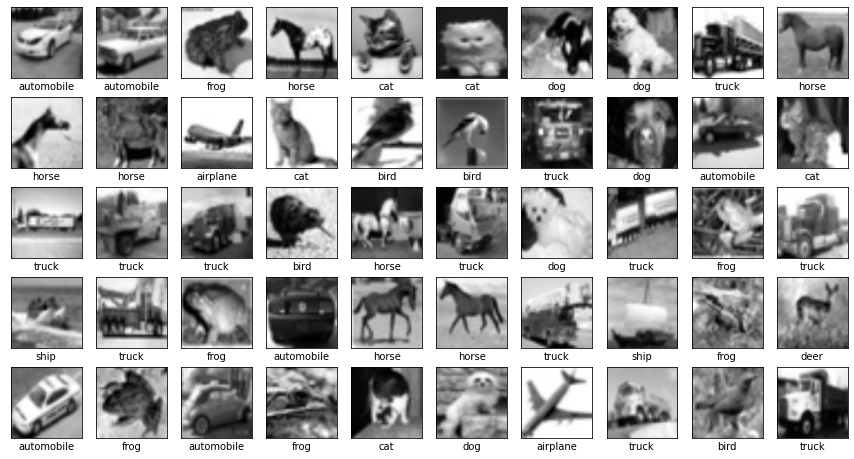

In [7]:
plt.figure(figsize=(15,8))
for i in range(50):
    plt.subplot(5,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(TRAIN_IMGS[i][0], cmap=plt.cm.gray)
    plt.xlabel(TRAIN_IMGS[i][1])
    
plt.show()  

In [8]:
fold0=TRAIN_IMGS[0:10000]
fold1=TRAIN_IMGS[10000:20000]
fold2=TRAIN_IMGS[20000:30000]
fold3=TRAIN_IMGS[30000:40000]
fold4=TRAIN_IMGS[40000:50000]
print(len(fold0))
print(len(fold1))
print(len(fold2))
print(len(fold3))
print(len(fold4))

10000
10000
10000
10000
10000


In [9]:
validation_set = fold4
print(len(validation_set))
train_set = fold0 + fold1 + fold2 + fold3
print(len(train_set))

10000
40000


40000it [00:01, 27174.40it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 57.89it/s]
40000it [00:01, 26754.56it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.56it/s]
40000it [00:01, 25663.45it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 54.32it/s]


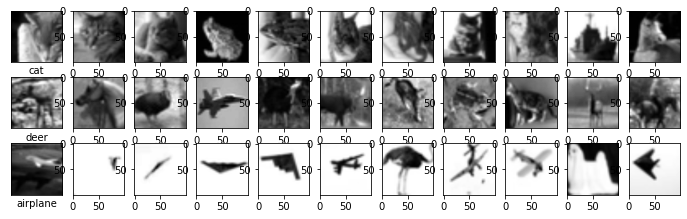

In [46]:
plt.figure(figsize=(12,12))
tmpIndex = 1
n=1
for i in range(3):
    
    plt.subplot(10, 11, tmpIndex)
    plt.imshow(validation_set[i][0], cmap=plt.cm.gray)
    plt.xlabel(validation_set[i][1])
    plt.xticks([])
    plt.yticks([])
    
    arr_list =[]
    arr_dict = {}
    for j,k in tqdm(enumerate(train_set)):
        dist_arr = np.abs(validation_set[i][0] - train_set[j][0]) 
        dist = np.sum(dist_arr) # mathatten / L1 distance
        arr_list.append(dist)
        arr_dict[dist] = train_set[j][0]
        
    
    k = 10
    min_index = nsmallest(k, arr_list)
   
    
    for m in tqdm(range(len(min_index))):
        plt.subplot(10, 11, n+1)
        plt.imshow(arr_dict[min_index[m]], cmap=plt.cm.gray)
        n=n+1
    tmpIndex += 11
    n=n+1
    

plt.show()

In [49]:
validation_set1 = fold3
print(len(validation_set1))
train_set1 = fold0 + fold1 + fold2 + fold4
print(len(train_set1))

10000
40000


40000it [00:04, 9952.31it/s] 
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 53.90it/s]
40000it [00:01, 22926.05it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 31.19it/s]
40000it [00:01, 27807.31it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 55.28it/s]


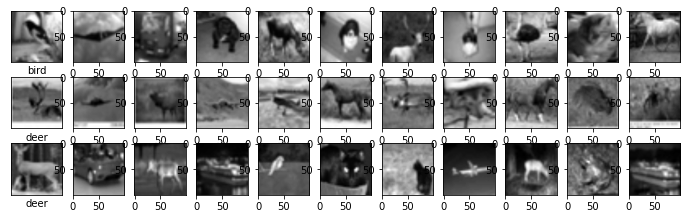

In [47]:
plt.figure(figsize=(12,12))
tmpIndex = 1
n=1
for i in range(3):
    
    plt.subplot(10, 11, tmpIndex)
    plt.imshow(validation_set1[i][0], cmap=plt.cm.gray)
    plt.xlabel(validation_set1[i][1])
    plt.xticks([])
    plt.yticks([])
    
    arr_list1 =[]
    arr_dict1 = {}
    for j,k in tqdm(enumerate(train_set1)):
        dist_arr = np.abs(validation_set1[i][0] - train_set1[j][0]) 
        dist = np.sum(dist_arr) # mathatten / L1 distance
        arr_list1.append(dist)
        arr_dict1[dist] = train_set1[j][0]
        
    
    k = 10
    min_index1 = nsmallest(k, arr_list1)
   
    
    for m in tqdm(range(len(min_index1))):
        plt.subplot(10, 11, n+1)
        plt.imshow(arr_dict1[min_index1[m]], cmap=plt.cm.gray)
        n=n+1
    tmpIndex += 11
    n=n+1
    

plt.show()

In [50]:
validation_set2 = fold2
print(len(validation_set2))
train_set2 = fold0 + fold1 + fold3 + fold4
print(len(train_set2))

10000
40000


40000it [00:01, 21506.59it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 14.73it/s]
40000it [00:02, 18766.84it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 37.47it/s]
40000it [00:02, 17417.56it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 31.33it/s]


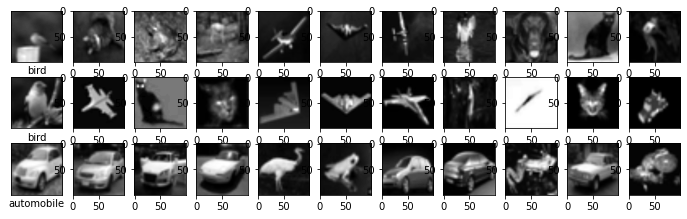

In [53]:
plt.figure(figsize=(12,12))
tmpIndex = 1
n=1
for i in range(3):
    
    plt.subplot(10, 11, tmpIndex)
    plt.imshow(validation_set2[i][0], cmap=plt.cm.gray)
    plt.xlabel(validation_set2[i][1])
    plt.xticks([])
    plt.yticks([])
    
    arr_list2 =[]
    arr_dict2 = {}
    for j,k in tqdm(enumerate(train_set2)):
        dist_arr = np.abs(validation_set2[i][0] - train_set2[j][0]) 
        dist = np.sum(dist_arr) # mathatten / L1 distance
        arr_list2.append(dist)
        arr_dict2[dist] = train_set2[j][0]
        
    
    k = 10
    min_index2 = nsmallest(k, arr_list2)
   
    
    for m in tqdm(range(len(min_index2))):
        plt.subplot(10, 11, n+1)
        plt.imshow(arr_dict2[min_index2[m]], cmap=plt.cm.gray)
        n=n+1
    tmpIndex += 11
    n=n+1
    

plt.show()

In [54]:
validation_set3 = fold1
print(len(validation_set3))
train_set3 = fold0 + fold2 + fold3 + fold4
print(len(train_set3))

10000
40000


40000it [00:02, 13407.53it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.25it/s]
40000it [00:01, 20095.62it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 26.53it/s]
40000it [00:02, 19187.00it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.84it/s]


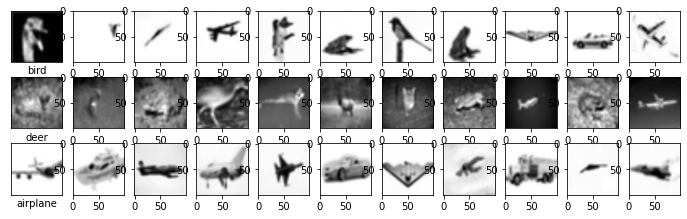

In [56]:
plt.figure(figsize=(12,12))
tmpIndex = 1
n=1
for i in range(3):
    
    plt.subplot(10, 11, tmpIndex)
    plt.imshow(validation_set3[i][0], cmap=plt.cm.gray)
    plt.xlabel(validation_set3[i][1])
    plt.xticks([])
    plt.yticks([])
    
    arr_list3 =[]
    arr_dict3 = {}
    for j,k in tqdm(enumerate(train_set3)):
        dist_arr = np.abs(validation_set3[i][0] - train_set3[j][0]) 
        dist = np.sum(dist_arr) # mathatten / L1 distance
        arr_list3.append(dist)
        arr_dict3[dist] = train_set3[j][0]
        
    
    k = 10
    min_index3 = nsmallest(k, arr_list3)
   
    
    for m in tqdm(range(len(min_index3))):
        plt.subplot(10, 11, n+1)
        plt.imshow(arr_dict3[min_index3[m]], cmap=plt.cm.gray)
        n=n+1
    tmpIndex += 11
    n=n+1
    

plt.show()

In [57]:
validation_set4 = fold0
print(len(validation_set4))
train_set4 = fold1 + fold2 + fold3 + fold4
print(len(train_set4))

10000
40000


40000it [00:02, 19303.20it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 36.27it/s]
40000it [00:02, 19850.71it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 35.68it/s]
40000it [00:02, 19682.06it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 24.94it/s]


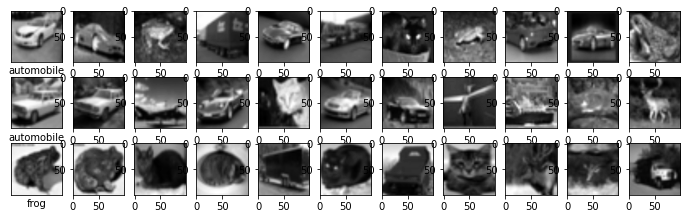

In [60]:
plt.figure(figsize=(12,12))
tmpIndex = 1
n=1
for i in range(3):
    
    plt.subplot(10, 11, tmpIndex)
    plt.imshow(validation_set4[i][0], cmap=plt.cm.gray)
    plt.xlabel(validation_set4[i][1])
    plt.xticks([])
    plt.yticks([])
    
    arr_list4 =[]
    arr_dict4 = {}
    for j,k in tqdm(enumerate(train_set4)):
        dist_arr = np.abs(validation_set4[i][0] - train_set4[j][0]) 
        dist = np.sum(dist_arr) # mathatten / L1 distance
        arr_list4.append(dist)
        arr_dict4[dist] = train_set4[j][0]
        
    
    k = 10
    min_index4 = nsmallest(k, arr_list4)
   
    
    for m in tqdm(range(len(min_index4))):
        plt.subplot(10, 11, n+1)
        plt.imshow(arr_dict4[min_index4[m]], cmap=plt.cm.gray)
        n=n+1
    tmpIndex += 11
    n=n+1
    

plt.show()